In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Phishing_Legitimate_full.csv')

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [7]:
import sweetviz as sv

In [9]:
import pandas as pd
from pandas_profiling import ProfileReport

# Assuming you have a DataFrame named df
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
float_cols=df.select_dtypes('float64').columns
for i in float_cols:
    df[i]=df[i].astype('float32')

In [13]:
int_cols=df.select_dtypes('int64').columns
for i in int_cols:
    df[i]=df[i].astype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [16]:
df.rename(columns={'CLASS_LABEL':'labels'},inplace=True)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


<AxesSubplot: >

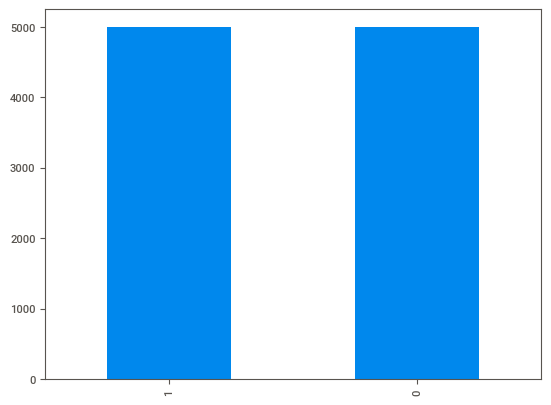

In [21]:
df['labels'].value_counts().plot(kind='bar')

In [23]:
def corr_heatmap(data,idx_s,idx_e):
    y=data['labels']
    temp=data.iloc[:,idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels']=y
    sns.heatmap(temp.corr(),annot=True,fmt='.2f')
    plt.show()
    

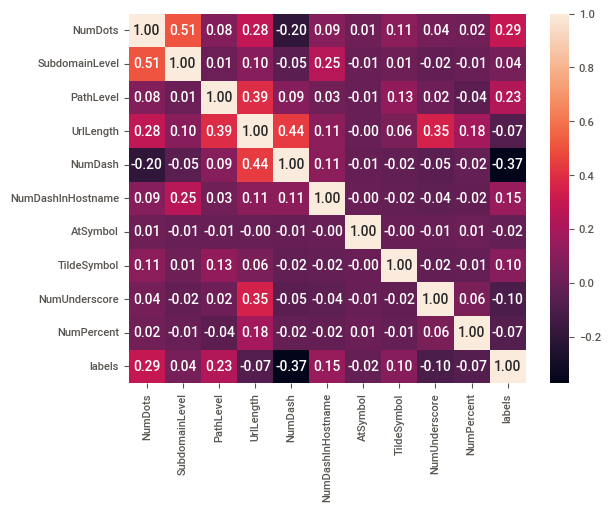

In [24]:
corr_heatmap(df,0,10)

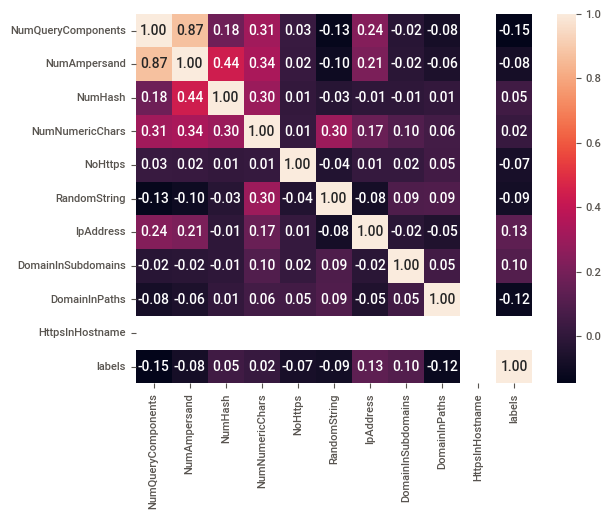

In [26]:
corr_heatmap(df,10,20)

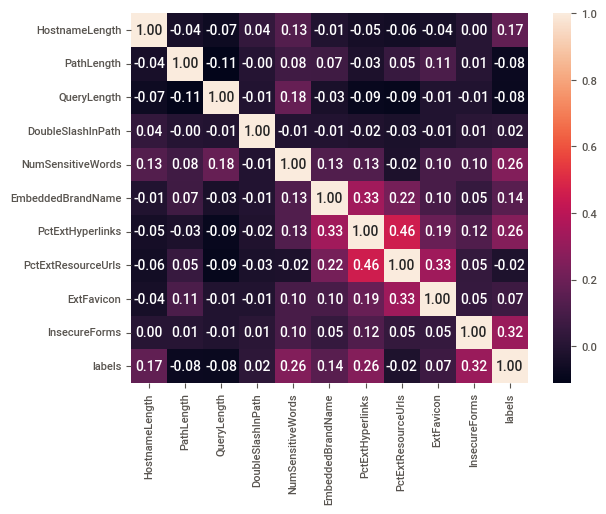

In [27]:
corr_heatmap(df,20,30)

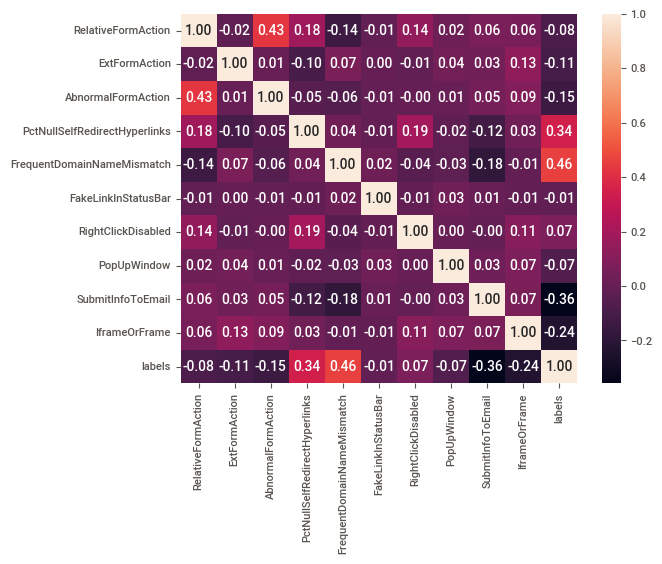

In [28]:
corr_heatmap(df,30,40)

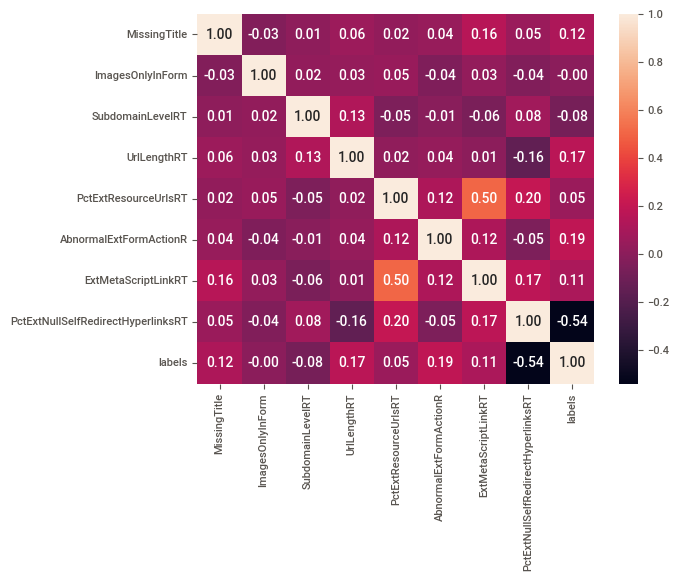

In [29]:
corr_heatmap(df,40,50)

In [31]:
from sklearn.feature_selection import mutual_info_classif

In [32]:
X=df.drop('labels',axis=1)
y=df['labels']

In [39]:
discrete_features=X.dtypes==int

In [40]:
mi_score=mutual_info_classif(X,y,discrete_features=discrete_features)
mi_score

array([6.55369979e-02, 6.39260958e-03, 5.54388666e-02, 5.26385513e-02,
       1.14013633e-01, 1.50293342e-02, 2.07989168e-04, 5.36292360e-03,
       1.03736573e-02, 3.79040716e-03, 3.36176837e-02, 1.96289415e-02,
       1.59688962e-03, 1.32671102e-01, 2.85490859e-03, 3.64323483e-03,
       1.20726479e-02, 5.49741939e-03, 7.00348281e-03, 1.77635684e-15,
       2.56424855e-02, 6.41326919e-02, 5.81855692e-02, 3.10128797e-04,
       4.18052188e-02, 1.06620827e-02, 4.64473011e-01, 2.88508912e-01,
       2.39822947e-03, 5.50809589e-02, 3.41968623e-03, 5.61394583e-03,
       1.11893402e-02, 2.30271661e-01, 1.25490779e-01, 1.11353671e-04,
       3.02405022e-03, 2.91936600e-03, 7.80261687e-02, 2.80549628e-02,
       7.35366130e-03, 6.78526546e-07, 4.50364440e-03, 1.51385297e-02,
       2.83105942e-02, 1.81660998e-02, 1.17543365e-01, 2.12385041e-01])

In [41]:
mi_score=pd.Series(mi_score,name='MI score',index=X.columns)
mi_score.sort_values(ascending=False)

PctExtHyperlinks                      4.644730e-01
PctExtResourceUrls                    2.885089e-01
PctNullSelfRedirectHyperlinks         2.302717e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

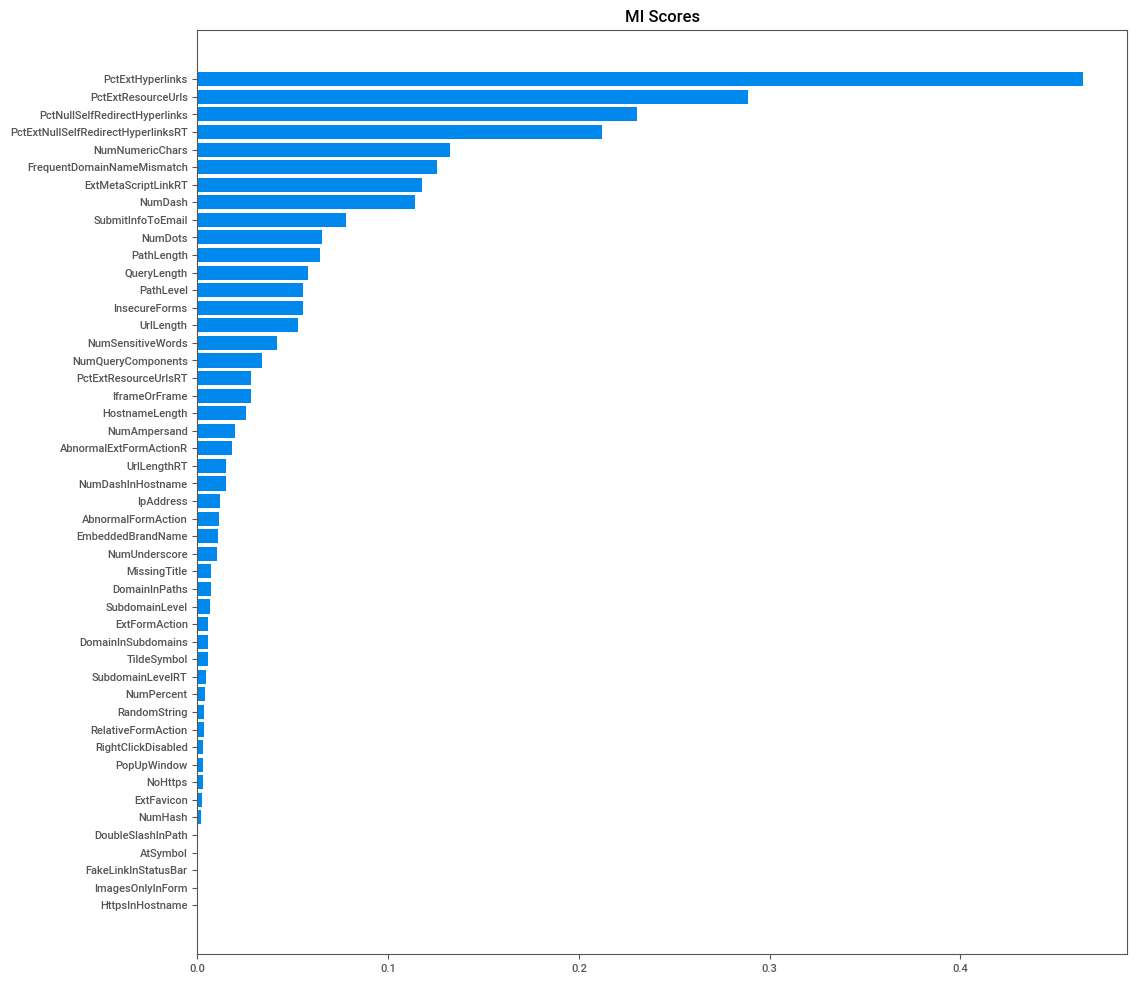

In [42]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('MI Scores')
    
plt.figure(dpi=100,figsize=(12,12))
plot_mi_scores(mi_score)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [56]:
def train_logistic(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [57]:
arr = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_logistic(df, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])


Performance for Logistic Model with Top 20 features is precision : 0.8911764705882353, recall : 0.9361483007209063, f1 score : 0.9131089904570567, accuracy : 0.9135
Performance for Logistic Model with Top 21 features is precision : 0.9175662414131501, recall : 0.9331337325349301, f1 score : 0.9252845126175161, accuracy : 0.9245
Performance for Logistic Model with Top 22 features is precision : 0.9113300492610837, recall : 0.9390862944162437, f1 score : 0.9249999999999999, accuracy : 0.925
Performance for Logistic Model with Top 23 features is precision : 0.8829787234042553, recall : 0.9364102564102564, f1 score : 0.9089099054255849, accuracy : 0.9085
Performance for Logistic Model with Top 24 features is precision : 0.9125840537944284, recall : 0.9359605911330049, f1 score : 0.9241245136186771, accuracy : 0.922
Performance for Logistic Model with Top 25 features is precision : 0.8910133843212237, recall : 0.9510204081632653, f1 score : 0.9200394866732476, accuracy : 0.919
Performance f

In [58]:
df_log=pd.DataFrame(arr,columns=['Number of feature','precisions','recall','f1-score','accuracy'])
df_log

,Number of feature,precisions,recall,f1-score,accuracy
0,20,0.891176,0.936148,0.913109,0.9135
1,21,0.917566,0.933134,0.925285,0.9245
2,22,0.911330,0.939086,0.925000,0.9250
3,23,0.882979,0.936410,0.908910,0.9085
4,24,0.912584,0.935961,0.924125,0.9220
5,25,0.891013,0.951020,0.920039,0.9190
6,26,0.906883,0.942166,0.924188,0.9265
7,27,0.911854,0.925926,0.918836,0.9205
8,28,0.918841,0.931440,0.925097,0.9230
9,29,0.911708,0.945274,0.928188,0.9265


<AxesSubplot: xlabel='Number of feature', ylabel='precisions'>

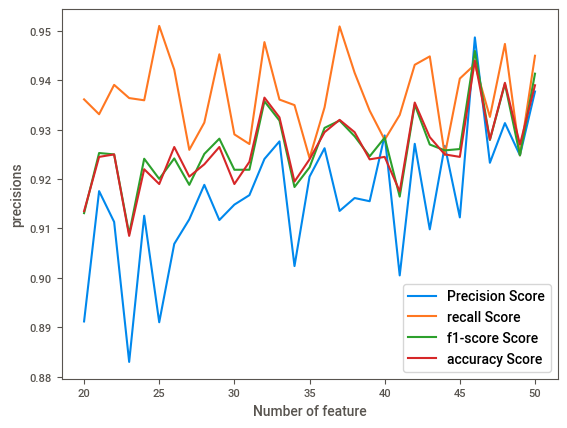

In [60]:
sns.lineplot(x='Number of feature',y='precisions',data=df_log,label='Precision Score')
sns.lineplot(x='Number of feature',y='recall',data=df_log,label='recall Score')
sns.lineplot(x='Number of feature',y='f1-score',data=df_log,label='f1-score Score')
sns.lineplot(x='Number of feature',y='accuracy',data=df_log,label='accuracy Score')

In [61]:
def train_rfc(data, top_n):
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
    rfc = RandomForestClassifier(n_estimators=500,
                criterion='entropy',
                max_depth=32,
                max_features=1.0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [62]:
arr1 = []
for i in range(20,51):
    precision, recall, f1, accuracy = train_rfc(df, i)
    print("Performance for RandomForestClassifier Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr1.append([i, precision, recall, f1, accuracy])


Performance for RandomForestClassifier Model with Top 20 features is precision : 0.9754420432220039, recall : 0.976401179941003, f1 score : 0.9759213759213758, accuracy : 0.9755
Performance for RandomForestClassifier Model with Top 21 features is precision : 0.9797297297297297, recall : 0.9863945578231292, f1 score : 0.983050847457627, accuracy : 0.9825
Performance for RandomForestClassifier Model with Top 22 features is precision : 0.9805725971370143, recall : 0.9845995893223819, f1 score : 0.9825819672131147, accuracy : 0.983
Performance for RandomForestClassifier Model with Top 23 features is precision : 0.981335952848723, recall : 0.9803729146221786, f1 score : 0.9808541973490427, accuracy : 0.9805
Performance for RandomForestClassifier Model with Top 24 features is precision : 0.9764585465711362, recall : 0.9804727646454265, f1 score : 0.9784615384615385, accuracy : 0.979
Performance for RandomForestClassifier Model with Top 25 features is precision : 0.9765784114052953, recall : 

In [63]:
df_rfc = pd.DataFrame(arr1, columns = ['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_rfc

,Number of feature,precisions,recall,f1-score,accuracy
0,20,0.975442,0.976401,0.975921,0.9755
1,21,0.979730,0.986395,0.983051,0.9825
2,22,0.980573,0.984600,0.982582,0.9830
3,23,0.981336,0.980373,0.980854,0.9805
4,24,0.976459,0.980473,0.978462,0.9790
5,25,0.976578,0.972617,0.974593,0.9750
6,26,0.980730,0.973817,0.977261,0.9775
7,27,0.976697,0.971774,0.974229,0.9745
8,28,0.978593,0.986639,0.982600,0.9830
9,29,0.982143,0.977295,0.979713,0.9795


<AxesSubplot: xlabel='Number of feature', ylabel='precisions'>

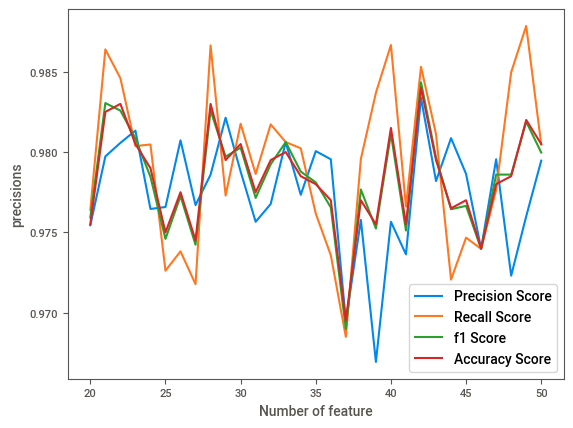

In [64]:
sns.lineplot(x = 'Number of feature', y = 'precisions', data = df_rfc, label = 'Precision Score')
sns.lineplot(x = 'Number of feature', y = 'recall', data = df_rfc, label = 'Recall Score')
sns.lineplot(x = 'Number of feature', y = 'f1-score', data = df_rfc, label = 'f1 Score')
sns.lineplot(x = 'Number of feature', y = 'accuracy', data = df_rfc, label = 'Accuracy Score')

In [65]:
top_n_features = mi_score.sort_values(ascending=False).head(38).index.tolist()
X = df[top_n_features]
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
rfc = RandomForestClassifier(n_estimators=500,
            criterion='entropy',
            max_depth=32,
            max_features=1.0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [66]:
print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(38, precision, recall, f1, accuracy))

Performance for RFC Model with Top 38 features is precision : 0.9701195219123506, recall : 0.9798792756539235, f1 score : 0.9749749749749749, accuracy : 0.975


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1006
           1       0.97      0.98      0.97       994

    accuracy                           0.97      2000
   macro avg       0.98      0.98      0.97      2000
weighted avg       0.98      0.97      0.98      2000

[[976  30]
 [ 20 974]]
